# Capítulo 6. Árboles de decisión

Al igual que los SVM, los árboles de decisión son algoritmos versátiles de aprendizaje automático que pueden realizar tanto tareas de clasificación y regresión, e incluso tareas de salida múltiple.

Son algoritmos poderosos, capaces de adaptarse a conjuntos de datos complejos.

Por ejemplo, en el Capítulo 2 entrenó un modelo ``DecisionTreeRegressor`` en el conjunto de datos de vivienda de California, ajustándolo perfectamente (en realidad, sobreajustado).

Los árboles de decisión también son los componentes fundamentales de los bosques aleatorios (consulte el Capítulo 7), que se encuentran entre los algoritmos de aprendizaje automático más potentes disponibles en la actualidad.

En este capítulo comenzaremos discutiendo cómo entrenar, visualizar y hacer predicciones con
Árboles de decisión.

Luego, revisaremos el algoritmo de entrenamiento CART utilizado por Scikit-Learn, y discutiremos cómo regularizar árboles y usarlos para tareas de regresión.

Finalmente, discutiremos algunas de las limitaciones de los árboles de decisión.

## Entrenamiento y visualización de un árbol de decisiones

Para comprender los árboles de decisión, creemos uno y veamos cómo hace predicciones.

El siguiente código entrena un DecisionTreeClassifier en el conjunto de datos del iris (consulte el Capítulo 4):

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

In [2]:
X = iris.data[:, 2:] # longitud y ancho del pétalo 

In [3]:
X[0:5,0:2] 

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [4]:
y = iris.target

In [5]:
y[:5]  

array([0, 0, 0, 0, 0])

In [6]:
y = y.reshape(-1,1)  

In [7]:
y[0:5,0]  

array([0, 0, 0, 0, 0])

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Puede visualizar el árbol de decisiones entrenado utilizando primero el método ``export_graphviz()`` para generar un archivo de definición de gráfico llamado iris_ tree.dot:

[sklearn.tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)

In [ ]:
conda install -c conda-forge scikit-learn 

In [12]:
from sklearn.tree import export_graphviz
from sklearn import tree
tree.export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Luego, puede usar la herramienta de línea de comandos ``dot`` del paquete Graphviz para convertir este archivo ``.dot`` a una variedad de formatos, como PDF o PNG.

Esta línea de comando convierte el archivo .dot en un archivo de imagen .png:

In [3]:
dot -Tpng iris_tree.dot -o iris_tree.png   

SyntaxError: invalid syntax (2077394442.py, line 1)

Su primer árbol de decisiones se parece a la figura 6-1.

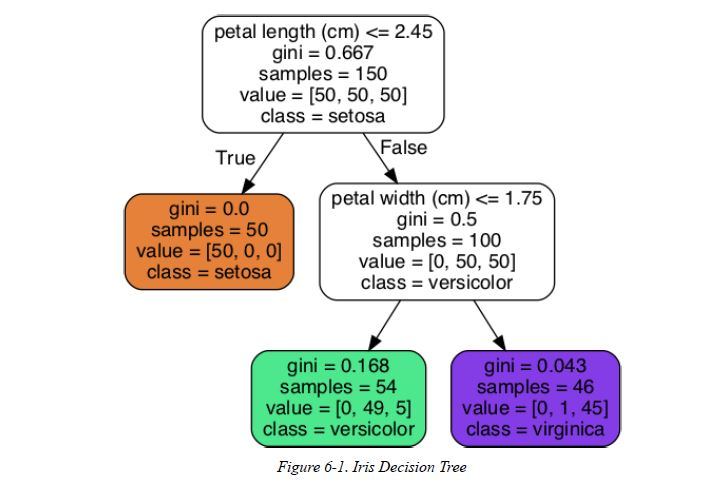

In [1]:
from IPython.display import Image
Image('figure_6_1.JPG', width=600, height=300) 

## Haciendo predicciones

Veamos cómo el árbol representado en la Figura 6-1 hace predicciones.

Suponga que encuentra una flor de iris y desea clasificarla.

Comienzas en el nodo de la raíz (profundidad 0, en la parte superior): este nodo pregunta si la longitud del pétalo de la flor es menor de 2,45 cm.

Si es así, baje hasta el nodo secundario izquierdo de la raíz (profundidad 1, izquierda).

En este caso, es un nodo hoja (es decir, no tiene ningún nodo hijo), por lo que no hace ninguna pregunta: simplemente mire la clase predicha para ese nodo y el árbol de decisiones predice que su flor es un Iris. setosa (clase = setosa).

Ahora suponga que encuentra otra flor, y esta vez la longitud del pétalo es superior a 2,45 cm.

Debes bajar al nodo hijo derecho de la raíz (profundidad 1, derecha), que no es un nodo de hoja, por lo que el nodo hace otra pregunta: ¿el ancho del pétalo es menor que 1,75 cm? Si es así, lo más probable es que su flor sea una Iris versicolor (profundidad 2, izquierda).

De lo contrario, es probable que sea una Iris virginica (profundidad 2, derecha). Realmente es así de simple.

## NOTE

Una de las muchas cualidades de los árboles de decisión es que requieren muy poca preparación de datos. De hecho, no requieren escalado o centrado de funciones en absoluto.

El atributo samples de un nodo cuenta a cuántas instancias de entrenamiento se aplica.

For example, 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm (depth 2, left).  

A node’s value attribute tells you how many training instances of each class this node applies to: for example, the bottomright node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.   

Finally, a node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.   

For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its gini score is $0$.   

La ecuación 6-1 muestra cómo el algoritmo de entrenamiento calcula la puntuación de gini $G_{i}$ del $i$ - ésimo nodo.

El nodo izquierdo de profundidad 2 tiene una puntuación de ``gini`` igual a 

$$ 1 – (0/54)^{2} – (49/54)^{2} – (5/54)^{2} \approx 0.168. $$

Equation 6-1. Gini impurity  

$$ G_{i} = 1 - \sum_{k = 1}^{n} p_{i,k}^{2}$$


En esta ecuación:
$p$ es la proporción de instancias de clase $k$ entre las instancias de entrenamiento en el nodo $i$.

## NOTE

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two
children (i.e., questions only have yes/no answers).   

However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

Figure 6-2 shows this Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm.   

Since the lefthand area is pure (only Iris setosa), it cannot be split any further.   

However, the righthand area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line).   

Since max_depth was set to 2, the Decision Tree stops right there.   

Si establece max_depth en 3, entonces los dos nodos de profundidad 2 agregarían cada uno otro límite de decisión (representado por las líneas de puntos).

In [ ]:
from IPython.display import Image
Image('figure_6_2.JPG',width=600,height=300) 

## MODEL INTERPRETATION: WHITE BOX VERSUS BLACK BOX

Decision Trees are intuitive, and their decisions are easy to interpret.  

Such models are often called white box models.   

In contrast, as we will see, Random Forests or neural networks are generally considered black box models.  

They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made.

For example, if a neural network says that a particular person appears on a picture, it is hard to know what contributed to this prediction: did the model recognize that person’s eyes? Their mouth? Their nose? Their shoes?  

Or even the couch that they were sitting on?   

Conversely, Decision Trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification).

## Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class $k$.  

First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class $k$ in this node.   

Por ejemplo, suponga que ha encontrado una flor cuyos pétalos miden 5 cm de largo y 1,5 cm de ancho.

El nodo de hoja correspondiente es el nodo izquierdo de profundidad 2, por lo que el árbol de decisión debería generar las siguientes probabilidades: 0% para Iris setosa (0/54), 90,7% para Iris versicolor (49/54) y 9,3% para Iris virginica (5/54).

And if you ask it to predict the class, it should output Iris versicolor (class 1) because it has the
highest probability. Let’s check this:

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

In [ ]:
tree_clf.predict([[5, 1.5]])

¡Perfecto! Observe que las probabilidades estimadas serían idénticas en cualquier otro lugar del rectángulo inferior derecho de la Figura 6-2, por ejemplo, si los pétalos fueran de 6 cm de largo y 1,5 cm de ancho (aunque parece obvio que lo más probable es que sea un Iris virginica en este caso).

## El algoritmo de entrenamiento CART

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees).   

The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold t (e.g., “petal length ≤ 2.45 cm”).   

How does it choose k and t ? It searches for the pair (k, t ) that produces the purest subsets
(weighted by their size).   

Equation 6-2 gives the cost function that the algorithm tries to minimize.

Equation 6-2. CART cost function for classification

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively.   

It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.  

A few other hyperparameters (described in a moment) control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

## WARNING 

As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level.   

It does not check whether or not the split will lead to the lowest possible impurity several levels down.   

A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal.

Unfortunately, finding the optimal tree is known to be an NP-Complete problem: it requires $O(exp(m))$ time, making the problem intractable even for small training sets.   

This is why we must settle for a “reasonably good” solution.

## Computational Complexity

Making predictions requires traversing the Decision Tree from the root to a leaf. 

Decision Trees generally are approximately balanced, so traversing the Decision Tree requires going through roughly $O(log_{2}(m))$ nodes.   

Since each node only requires checking the value of one feature, the overall prediction complexity is $O(log_{2}(m))$, independent of the number of features.   

So predictions are very fast, even when dealing with large training sets.

The training algorithm compares all features (or less if ``max_features`` is set) on all samples at each node.   

Comparing all features on all samples at each node results in a training complexity of $O(n \times m log_{2}(m))$.  

For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data (set presort=True), but doing that slows down training considerably for larger training sets.

## Gini Impurity or Entropy?

By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".   

El concepto de entropía se originó en la termodinámica como medida del desorden molecular: la entropía.
se aproxima a cero cuando las moléculas están quietas y bien ordenadas.

Entropy later spread to a wide variety of domains, including Shannon’s information theory, where it measures the average information content of a message: entropy is zero when all messages are identical. 

In Machine Learning, entropy is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.   

Equation 6-3 shows the definition of the entropy of the i node.   

For example, the depth-2 left node in Figure 6-1 has an entropy equal to

$$ − \frac{49}{54}\log_{2} \left( \frac{49}{54} \right) − \frac{5}{54} \log_{2} \left( \frac{5}{54}\right) \approx  0.445. $$

Equation 6-3. Entropy

$$ Hi = − n \sum_{k=1\\ p_{ik} \neq 0} p_{i,k} \log_{2} (p_{i,k}) $$ 

So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees.   

Gini impurity is slightly faster to compute, so it is a good default.   

However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Hiperparámetros de regularización

Decision Trees make very few assumptions about the training data (as opposed to linear models, which assume that the data is linear, for example).  

If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely—indeed, most likely